# annotate conflict of interest statements (for individual authors)

flag 1 for "has conflict" or 0 for "no conflict"

In [1]:
import pandas as pd
from normality import normalize
%matplotlib inline

In [2]:
df = pd.read_csv('../data/full/meta/Documentation.coi.individual.csv')
df['date'] = pd.to_datetime(df['date'].fillna('').map(lambda x: x.split(';')[0]).map(str.strip))
df.head()

id  \
0  000001758a3c4c8d92d90f3b0b90739fd9aa8554   
1  00000554131a56069fb56bd92144ba61941aa1b0   
2  0000091f7eea4b3fdd02bf723f6d1aee3a1ebacb   
3  00000c447f4e0f09c9d379987e6cb58f90566acc   
4  00000d647069af52c976e08bd59784e65f03dda0   

                                   document  \
0  9582d120af24d0cf17d17852369314f30d11e42a   
1  29bf773d2f322d1ee392dd33b72ca40c4e4e16d7   
2  f648f14e60854f127779d92651982393fccda25a   
3  a0c283dac959c387689772500b8c80e31d2cc53c   
4  ab226a70548b71c4fd4c300314648590c225c934   

                                     entity                         publisher  \
0  30373d8ff44704269b7d7e1935cff112dcef5df4                      PLoS Biology   
1  a866919be307c6f827b33e667f7f1c4760a9dfdb  Patient preference and adherence   
2  cfc820dc06837014aa82493f29f7a31a4ee9e8cd                Scientific Reports   
3  24ccf0cc23343cbf3b53a479e3eadd0ff5ad51d6                      Marine Drugs   
4  de9b0e3cf1deec348309a22d3f0a7292bdadc59a                         Nutrients   

                                             summary       date  
0  The authors have declared that no competing in... 2016-08-19  
1  The authors report no conflicts of interest in... 2018-07-27  
2  The authors declare no competing financial int... 2017-03-06  
3  Conflicts of Interest\nThe authors declare no ... 2017-03-22  
4  Conflicts of Interest\nThe authors declare no ... 2018-12-05

In [3]:
len(df)

6956668

In [4]:
# links: author -> coi statement <- article
# coi statement (document) <- author (entity)
# article (document) -> coi statement (entity)

df = df.merge(df[['document', 'entity']], left_on='document', right_on='entity')[[
    'date',
    'entity_x',
    'document_y',
    'publisher',
    'summary',
]].rename(columns={
    'document_y': 'article',
    'entity_x': 'author'
})
len(df)

3478334

In [5]:
df.head()

date                                    author  \
0 2016-08-19  30373d8ff44704269b7d7e1935cff112dcef5df4   
1 2017-03-06  cfc820dc06837014aa82493f29f7a31a4ee9e8cd   
2 2017-03-22  24ccf0cc23343cbf3b53a479e3eadd0ff5ad51d6   
3 2018-12-05  de9b0e3cf1deec348309a22d3f0a7292bdadc59a   
4 2017-09-12  f051c85145002aa4beff838fb31e911df31a1c9e   

                                    article           publisher  \
0  ea83fc5356206a917eb84357579373c01864ffff        PLoS Biology   
1  41c9ab5af84a081936454d3e01b5c5bd87f4327e  Scientific Reports   
2  b533d8c46e2362e48b8f7edd7e34cdd20c27f203        Marine Drugs   
3  83bbf6872ba7077bbe64eb23417d7743becfbc36           Nutrients   
4  23dc11cf0bc63932997fc2f8349a3a2779a6ce49          Oncotarget   

                                             summary  
0  The authors have declared that no competing in...  
1  The authors declare no competing financial int...  
2  Conflicts of Interest\nThe authors declare no ...  
3  Conflicts of Interest\nThe authors declare no ...  
4  The authors have declared that no conflicts of...

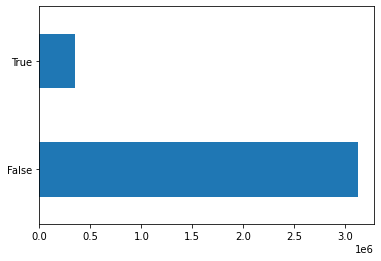

In [6]:
def get_has_conflict(text):
    if pd.isnull(text):
        return False
    text = normalize(text.replace('\n', ' '))
    if 'all others' in text:
        return True
    if 'remaining authors' in text:
        return True
    if 'no other' in text:
        return True
    if 'employee' in text:
        return True
    #if 'funded by': 
    #    return True
    if 'research grant' in text:
        return True
    if 'no conflict' in text:
        return False
    if 'no potential conflict' in text:
        return False
    if 'no competing' in text:
        return False
    if 'no financial' in text:
        return False
    if 'no known' in text:
        return False
    if text == 'none':
        return False
    if text.startswith('none '):
        return False
    if text.endswith('none'):
        return False
    if 'nothing to report' in text:
        return False
    if 'none declared' in text:
        return False
    if 'no authors have' in text:
        return False
    if 'none of the authors have' in text:
        return False
    if len(text) < 50:
        return False
    return True

df['has_conflict'] = df['summary'].map(get_has_conflict)
df['has_conflict'].value_counts().plot.barh()

In [7]:
def to_int(val):
    try:
        return int(val)
    except TypeError:
        return -1
    
df['has_conflict'] = df['has_conflict'].map(to_int)
df['has_conflict'].value_counts()

0    3129313
1     349021
Name: has_conflict, dtype: int64

In [8]:
df.head()

date                                    author  \
0 2016-08-19  30373d8ff44704269b7d7e1935cff112dcef5df4   
1 2017-03-06  cfc820dc06837014aa82493f29f7a31a4ee9e8cd   
2 2017-03-22  24ccf0cc23343cbf3b53a479e3eadd0ff5ad51d6   
3 2018-12-05  de9b0e3cf1deec348309a22d3f0a7292bdadc59a   
4 2017-09-12  f051c85145002aa4beff838fb31e911df31a1c9e   

                                    article           publisher  \
0  ea83fc5356206a917eb84357579373c01864ffff        PLoS Biology   
1  41c9ab5af84a081936454d3e01b5c5bd87f4327e  Scientific Reports   
2  b533d8c46e2362e48b8f7edd7e34cdd20c27f203        Marine Drugs   
3  83bbf6872ba7077bbe64eb23417d7743becfbc36           Nutrients   
4  23dc11cf0bc63932997fc2f8349a3a2779a6ce49          Oncotarget   

                                             summary  has_conflict  
0  The authors have declared that no competing in...             0  
1  The authors declare no competing financial int...             0  
2  Conflicts of Interest\nThe authors declare no ...             0  
3  Conflicts of Interest\nThe authors declare no ...             0  
4  The authors have declared that no conflicts of...             0

In [9]:
df[['date', 'article', 'author', 'publisher', 'has_conflict']].to_csv('./export/coi.individual.annotated.csv', index=False)